In [132]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [133]:
az.style.use('arviz-darkgrid')

## PyMC3 primer

In [134]:
np.random.seed(123)
trials = 4
theta_real = 0.35  # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)
data

array([1, 0, 0, 0])

In [135]:
#stats.bernoulli? #A Bernoulli discrete random variable

In [136]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta('θ', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123, chains=2) #test number of chains

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3074.40draws/s]


In [141]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta('θ', alpha=1., beta=1.)
    # likelihood
    y1 = pm.Bernoulli('y1', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123, chains=2) #test number of chains

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3254.88draws/s]


### Summarizing the posterior

In [68]:
type(trace)

pymc3.backends.base.MultiTrace

In [69]:
trace

<MultiTrace: 2 chains, 1000 iterations, 2 variables>

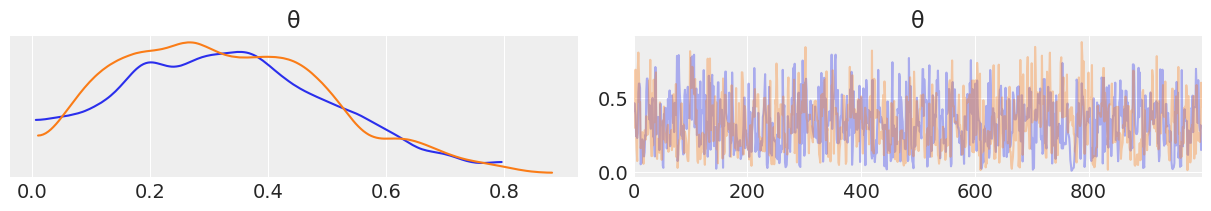

In [142]:
az.plot_trace(trace)
plt.savefig('B11197_02_01.png')

In [71]:
az.summary(trace)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
θ,0.33,0.18,0.0,0.02,0.64,847.0,1.0


#### Try more 

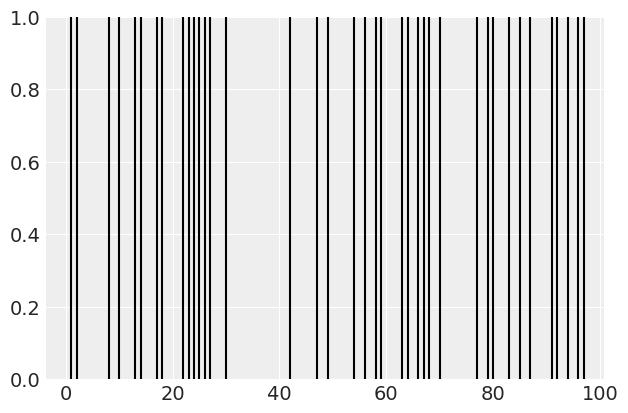

In [105]:
#test more random numbers
#np.random.seed(123)
trials = 100
theta_real = 0.35  # unknown value in a real experiment
data2 = stats.bernoulli.rvs(p=theta_real, size=trials)
#looks better than plt.plot(data)
av=np.array(range(len(data2)))
indexv=av[data2==1]
for i in range(len(indexv)):
    plt.axvline(indexv[i], ymax=1, color='k')

(array([6500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

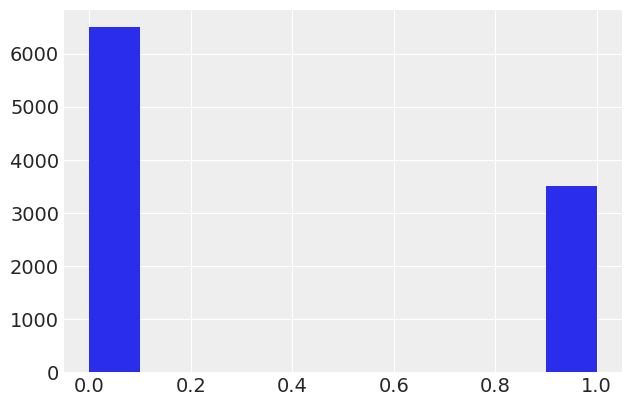

In [106]:
#try more
trials = 10000
theta_real = 0.35  # unknown value in a real experiment
data2 = stats.bernoulli.rvs(p=theta_real, size=trials)

plt.hist(data2) 

In [107]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta('θ', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data2)
    trace2 = pm.sample(1000, random_seed=123,chains=4) #test number of chains

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4399.23draws/s]
The acceptance probability does not match the target. It is 0.8795663882303514, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8845868114539386, but should be close to 0.8. Try to increase the number of tuning steps.


Note that the trances will be plotted for each chain.

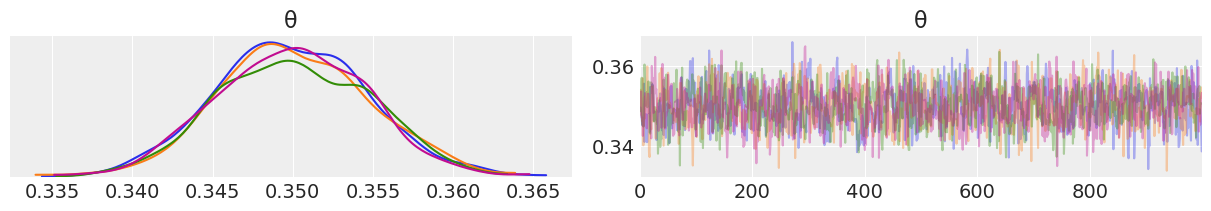

In [108]:
az.plot_trace(trace2)
plt.savefig('B11197_02_01_more.png')

In [109]:
az.summary(trace2) #does this consider all the chains?

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
θ,0.35,0.0,0.0,0.34,0.36,1603.0,1.0


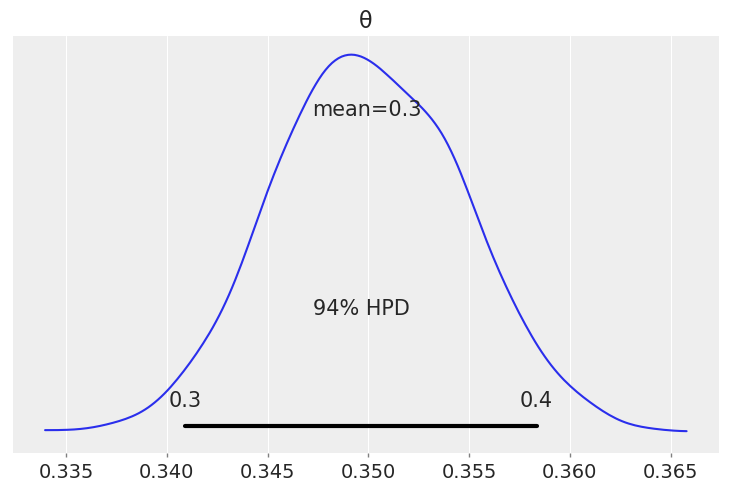

In [111]:
az.plot_posterior(trace2)
plt.savefig('B11197_02_02_test.png', dpi=300)

In [122]:
plt.kde?

Object `plt.kde` not found.


In [113]:
trace2['θ'].shape

(4000,)

In [115]:
trace2['θ'].mean(),trace2['θ'].std()

(0.34993746410588117, 0.004681540868637396)

(array([ 2.,  1.,  1.,  4.,  3.,  5.,  8., 14., 20., 27., 47., 58., 61.,
        82., 96., 83., 77., 64., 86., 60., 49., 34., 41., 23., 21., 15.,
         9.,  5.,  1.,  3.]),
 array([0.33395789, 0.33495481, 0.33595173, 0.33694865, 0.33794556,
        0.33894248, 0.3399394 , 0.34093632, 0.34193324, 0.34293015,
        0.34392707, 0.34492399, 0.34592091, 0.34691783, 0.34791474,
        0.34891166, 0.34990858, 0.3509055 , 0.35190242, 0.35289933,
        0.35389625, 0.35489317, 0.35589009, 0.35688701, 0.35788392,
        0.35888084, 0.35987776, 0.36087468, 0.3618716 , 0.36286851,
        0.36386543]),
 <a list of 30 Patch objects>)

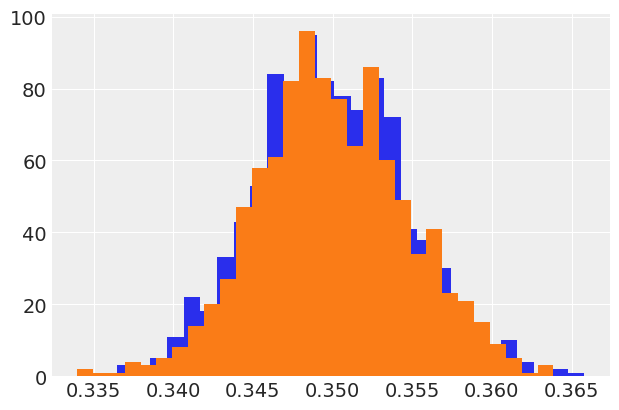

In [121]:
plt.hist(trace2['θ'][:1000],bins=30)
plt.hist(trace2['θ'][1000:2000],bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c34985e48>],
      dtype=object)

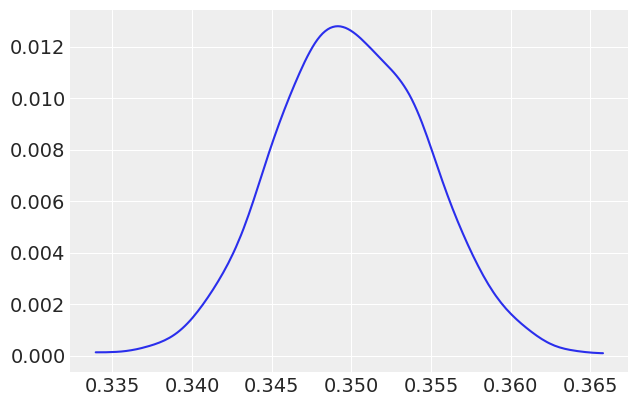

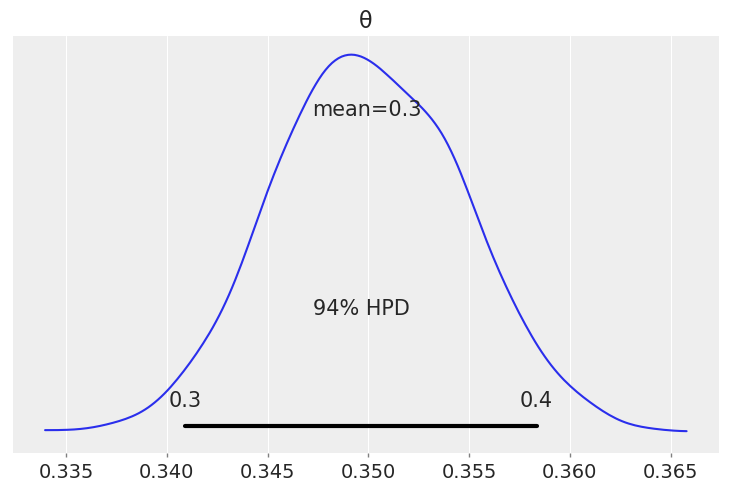

In [125]:
az.plot_kde(trace2['θ'])
az.plot_posterior(trace2)

#### Posterior-based decisions

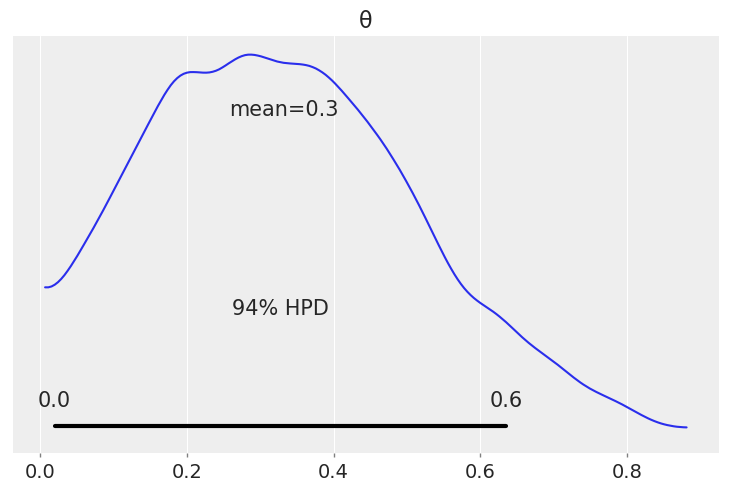

In [110]:
az.plot_posterior(trace)
plt.savefig('B11197_02_02.png', dpi=300)

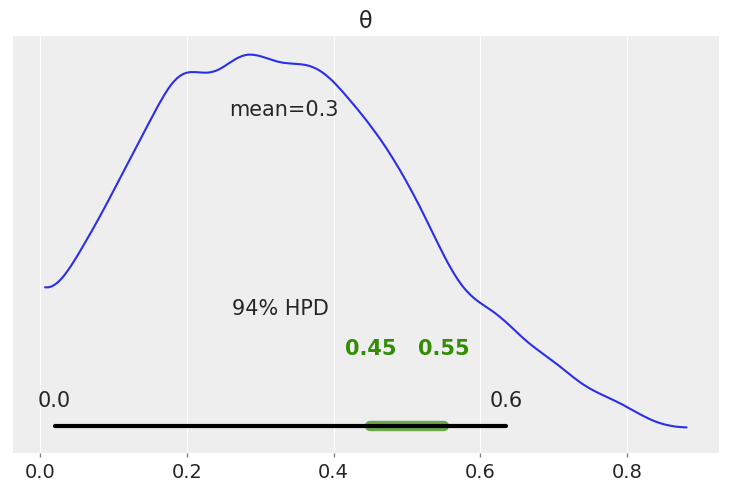

In [86]:
az.plot_posterior(trace, rope=[0.45, .55])
plt.savefig('B11197_02_03.png', dpi=300)

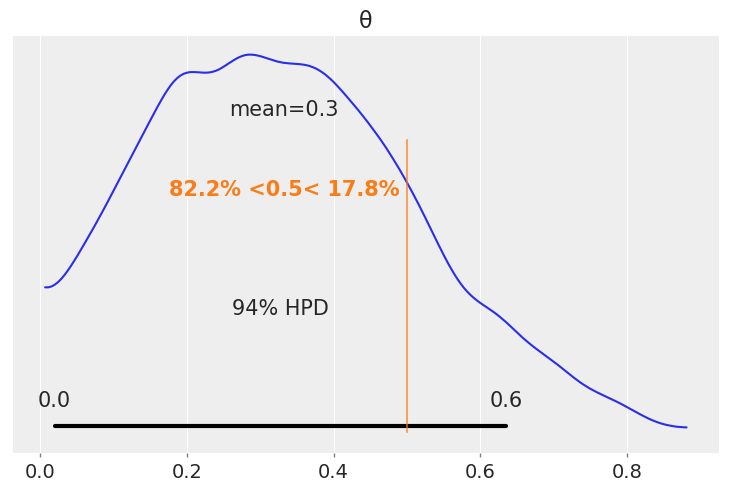

In [87]:
az.plot_posterior(trace, ref_val=0.5)
plt.savefig('B11197_02_04.png', dpi=300)

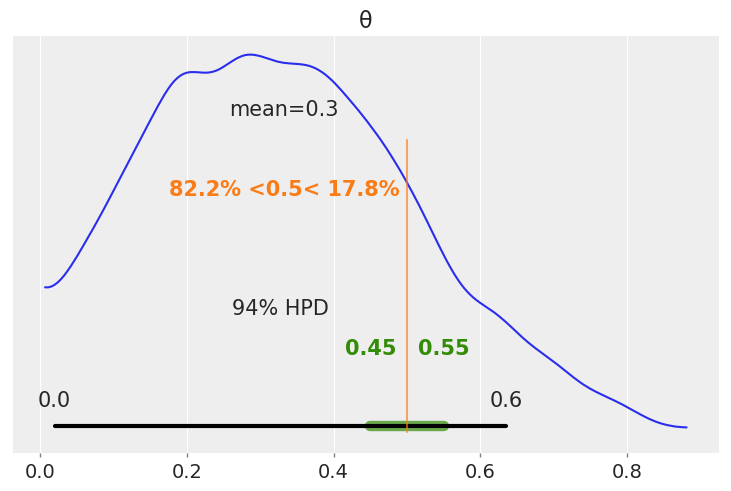

In [88]:
az.plot_posterior(trace, rope=[0.45, .55],ref_val=0.5)
plt.savefig('B11197_02_03_test.png', dpi=300)

In [92]:
θ_pos

array([0.41538253, 0.4655505 , 0.42601734, ..., 0.26255893, 0.60485134,
       0.44372845])

In [97]:
az.summary(trace)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
θ,0.33,0.18,0.0,0.02,0.64,847.0,1.0


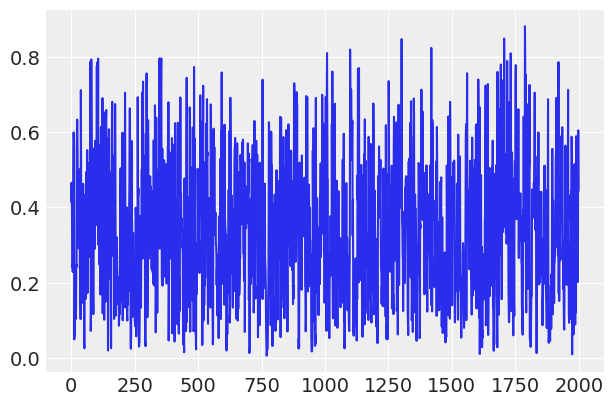

In [100]:
plt.plot(trace['θ'])

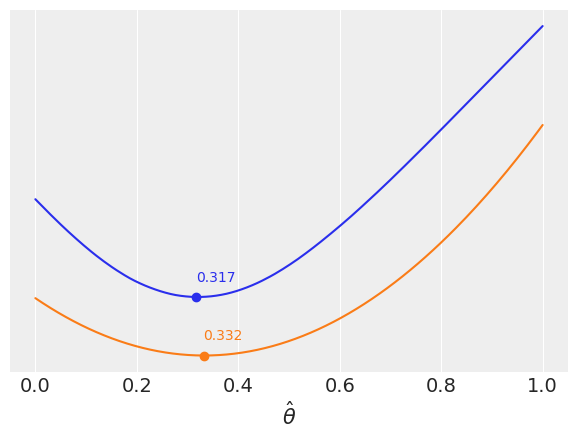

In [131]:
grid = np.linspace(0, 1, 200)
θ_pos = trace['θ']
lossf_a = [np.mean(abs(i - θ_pos)) for i in grid] #loss respect to all the estimated theta values20
lossf_b = [np.mean((i - θ_pos)**2) for i in grid]

for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    plt.plot(grid, lossf, c)
    plt.plot(grid[mini], lossf[mini], 'o', color=c)
    plt.annotate('{:.3f}'.format(grid[mini]),
                 (grid[mini], lossf[mini] + 0.03), color=c)
    plt.yticks([])
    plt.xlabel(r'$\hat \theta$')
plt.savefig('B11197_02_05.png', dpi=300)

In [90]:
np.mean(θ_pos), np.median(θ_pos)

(0.33279742590787614, 0.3191783444119001)

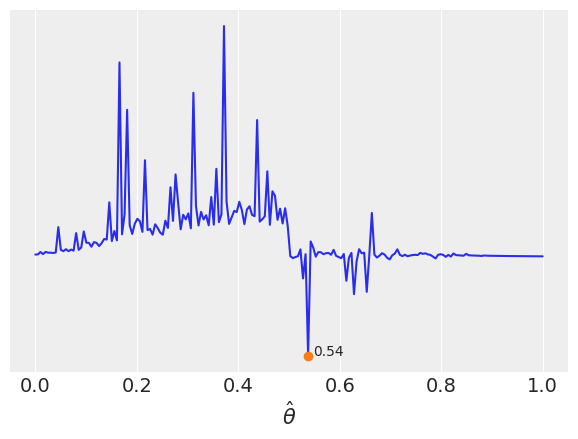

In [12]:
lossf = []
for i in grid:
    if i < 0.5:
        f = np.mean(np.pi * θ_pos / np.abs(i - θ_pos))
    else:
        f = np.mean(1 / (i - θ_pos))
    lossf.append(f)

mini = np.argmin(lossf)
plt.plot(grid, lossf)
plt.plot(grid[mini], lossf[mini], 'o')
plt.annotate('{:.2f}'.format(grid[mini]),
             (grid[mini] + 0.01, lossf[mini] + 0.1))
plt.yticks([])
plt.xlabel(r'$\hat \theta$')
plt.savefig('B11197_02_06.png', dpi=300)

## Gaussian inferences

In [144]:
type(data)

numpy.ndarray

In [148]:
az.plot_kde?

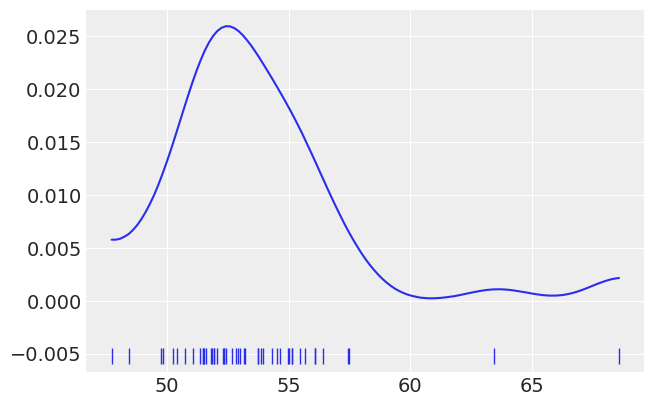

In [147]:
data = np.loadtxt('../data/chemical_shifts.csv')

# remove outliers using the interquartile rule
#quant = np.percentile(data, [25, 75])
#iqr = quant[1] - quant[0]
#upper_b = quant[1] + iqr * 1.5
#lower_b = quant[0] - iqr * 1.5
#data = data[(data > lower_b) & (data < upper_b)]
#print(np.mean(data), np.std(data))

az.plot_kde(data, rug=True)
#plt.yticks([0], alpha=0)
#plt.yticks([0], alpha=0) #remove y tick
plt.savefig('B11197_02_07.png', dpi=300)

 <img src="B11197_02_08.png" width="500">

In [161]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data)
    #y = pm.Normal('y', mu=μ, sd=σ)#, observed=data) somehow y become an variable
    trace_g = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4589.83draws/s]


In [159]:
trace_g.varnames

['μ_interval__', 'σ_log__', 'μ', 'σ']

In [157]:
#y = pm.Normal('y', mu=μ, sd=σ)
#trace_g.varnames=['μ_interval__', 'σ_log__', 'y', 'μ', 'σ']

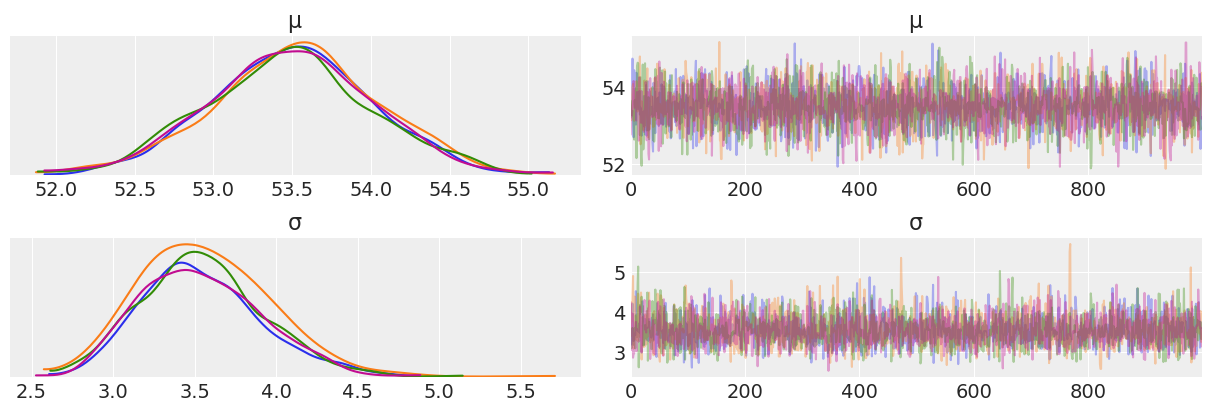

In [162]:
az.plot_trace(trace_g)
plt.savefig('B11197_02_09.png', dpi=300)

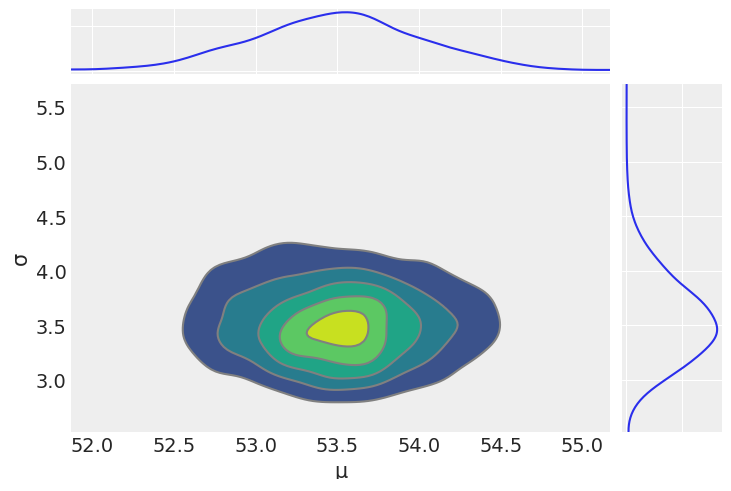

In [163]:
az.plot_joint(trace_g, kind='kde', fill_last=False)
plt.savefig('B11197_02_10.png', dpi=300)

In [164]:
az.summary(trace_g)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,53.49,0.52,0.01,52.53,54.47,4177.0,1.0
σ,3.55,0.38,0.01,2.88,4.28,3755.0,1.0


In [180]:
y_pred_g = pm.sample_posterior_predictive(trace_g, 1000, model_g)

100%|██████████| 1000/1000 [00:00<00:00, 2320.15it/s]


In [167]:
type(y_pred_g)

dict

In [179]:
data.shape

(48,)

In [177]:
trace_g

<MultiTrace: 4 chains, 1000 iterations, 4 variables>

In [174]:
y_pred_g['y'].shape #generate 100 samples of the same data size

(100, 48)

In [170]:
y_pred_g.keys()

dict_keys(['y'])

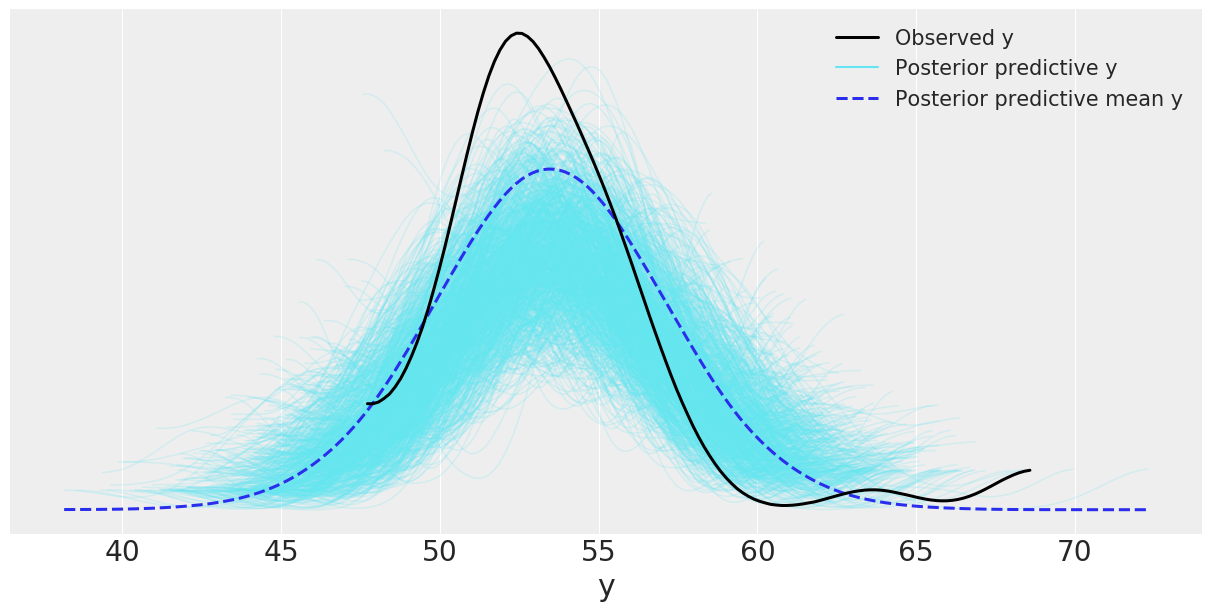

In [182]:
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
ax[0].legend(fontsize=15)
plt.savefig('B11197_02_11.png', dpi=300)

### Robust inferences

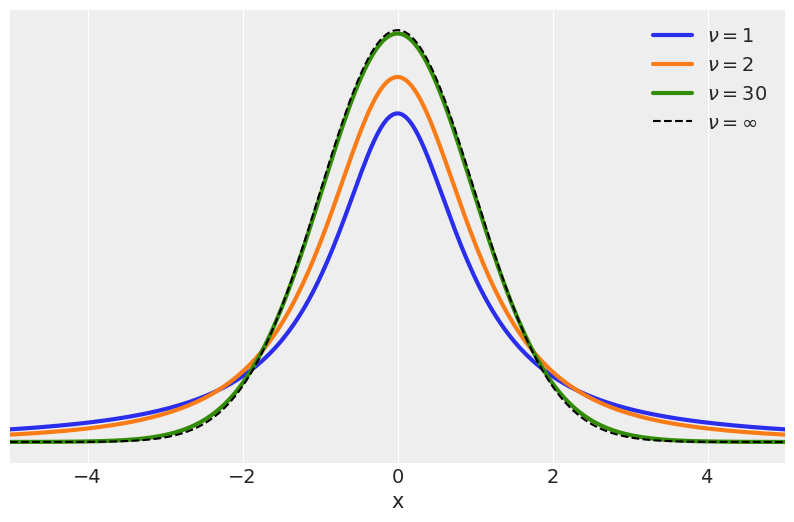

In [183]:
plt.figure(figsize=(10, 6))
x_values = np.linspace(-10, 10, 500)
for df in [1, 2, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=fr'$\nu = {df}$', lw=3)

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, 'k--', label=r'$\nu = \infty$')
plt.xlabel('x')
plt.yticks([])
plt.legend()
plt.xlim(-5, 5)
plt.savefig('B11197_02_12.png', dpi=300)

 <img src="B11197_02_13.png" width="500">

In [186]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75)
    σ = pm.HalfNormal('σ', sd=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', mu=μ, sd=σ, nu=ν, observed=data)
    trace_t = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, σ, μ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3280.22draws/s]


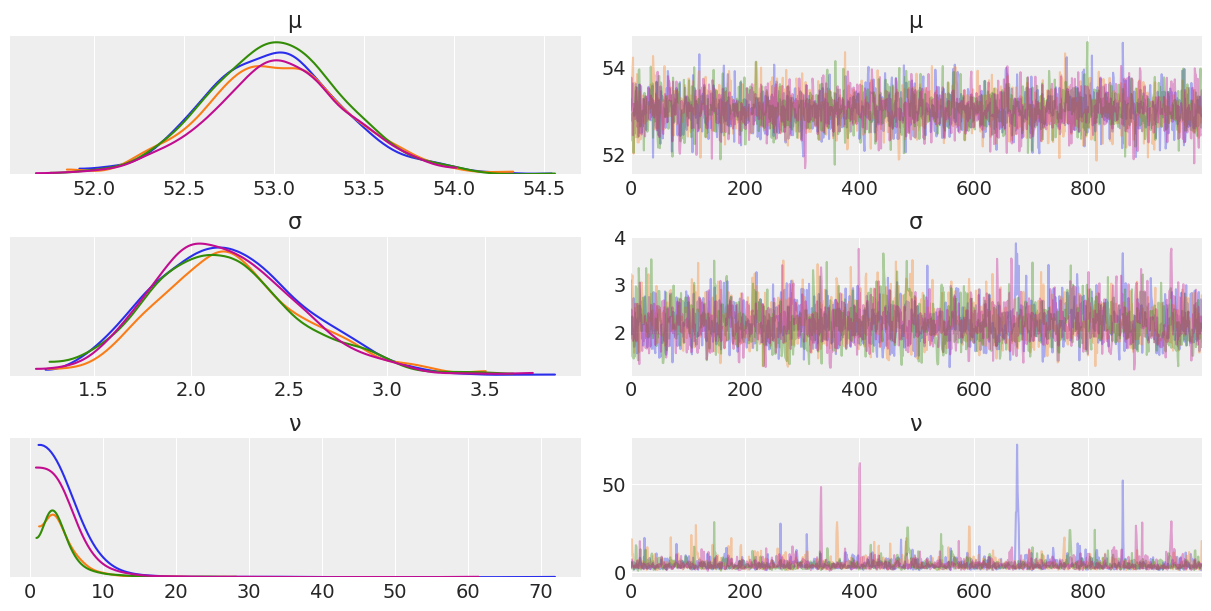

In [187]:
az.plot_trace(trace_t)
plt.savefig('B11197_02_14.png', dpi=300)

In [188]:
az.summary(trace_t)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,53.01,0.38,0.01,52.30,53.75,3352.0,1.0
σ,2.19,0.38,0.01,1.50,2.92,1953.0,1.0
ν,4.54,3.68,0.12,1.22,9.18,1432.0,1.0


100%|██████████| 1000/1000 [00:00<00:00, 2351.07it/s]


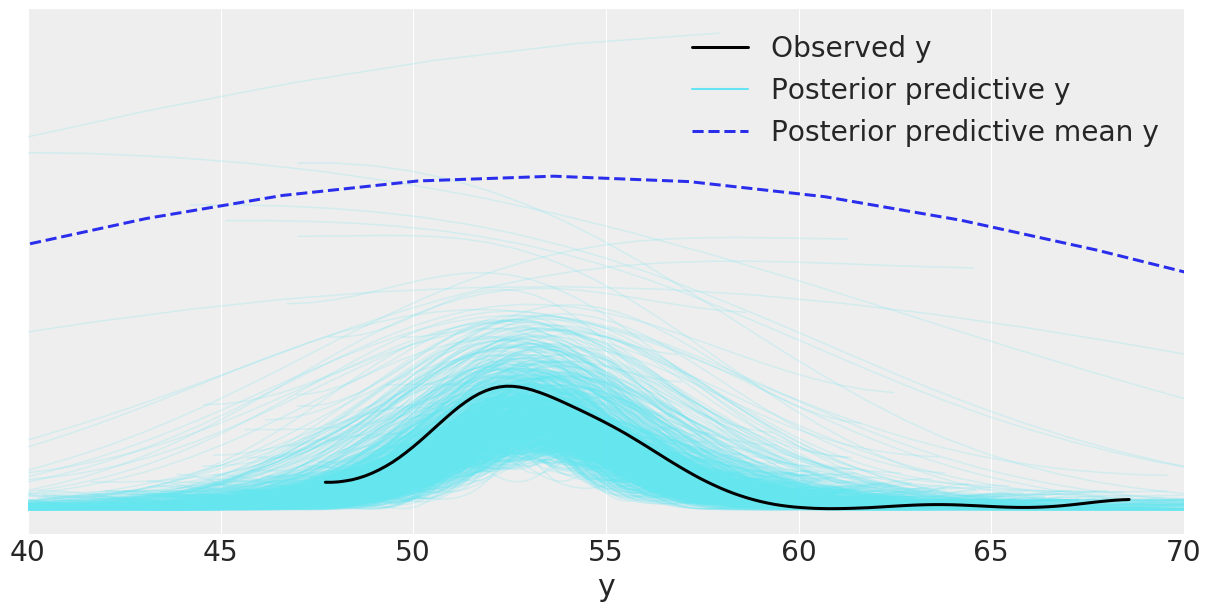

In [191]:
y_ppc_t = pm.sample_posterior_predictive(
    trace_t, 1000, model_t, random_seed=123)
y_pred_t = az.from_pymc3(trace=trace_t, posterior_predictive=y_ppc_t)
az.plot_ppc(y_pred_t, figsize=(12, 6), mean=True)
ax[0].legend(fontsize=15)
plt.xlim(40, 70)
plt.savefig('B11197_02_15.png', dpi=300)

# Tips example

In [192]:
tips = pd.read_csv('../data/tips.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


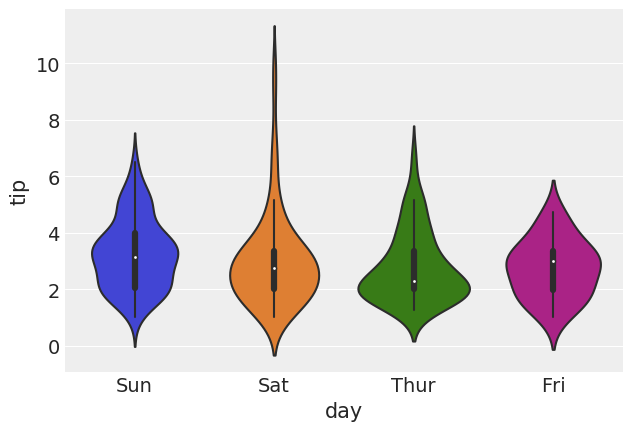

In [193]:
sns.violinplot(x='day', y='tip', data=tips)
plt.savefig('B11197_02_16.png', dpi=300)

In [194]:
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:14<00:00, 1512.34draws/s]


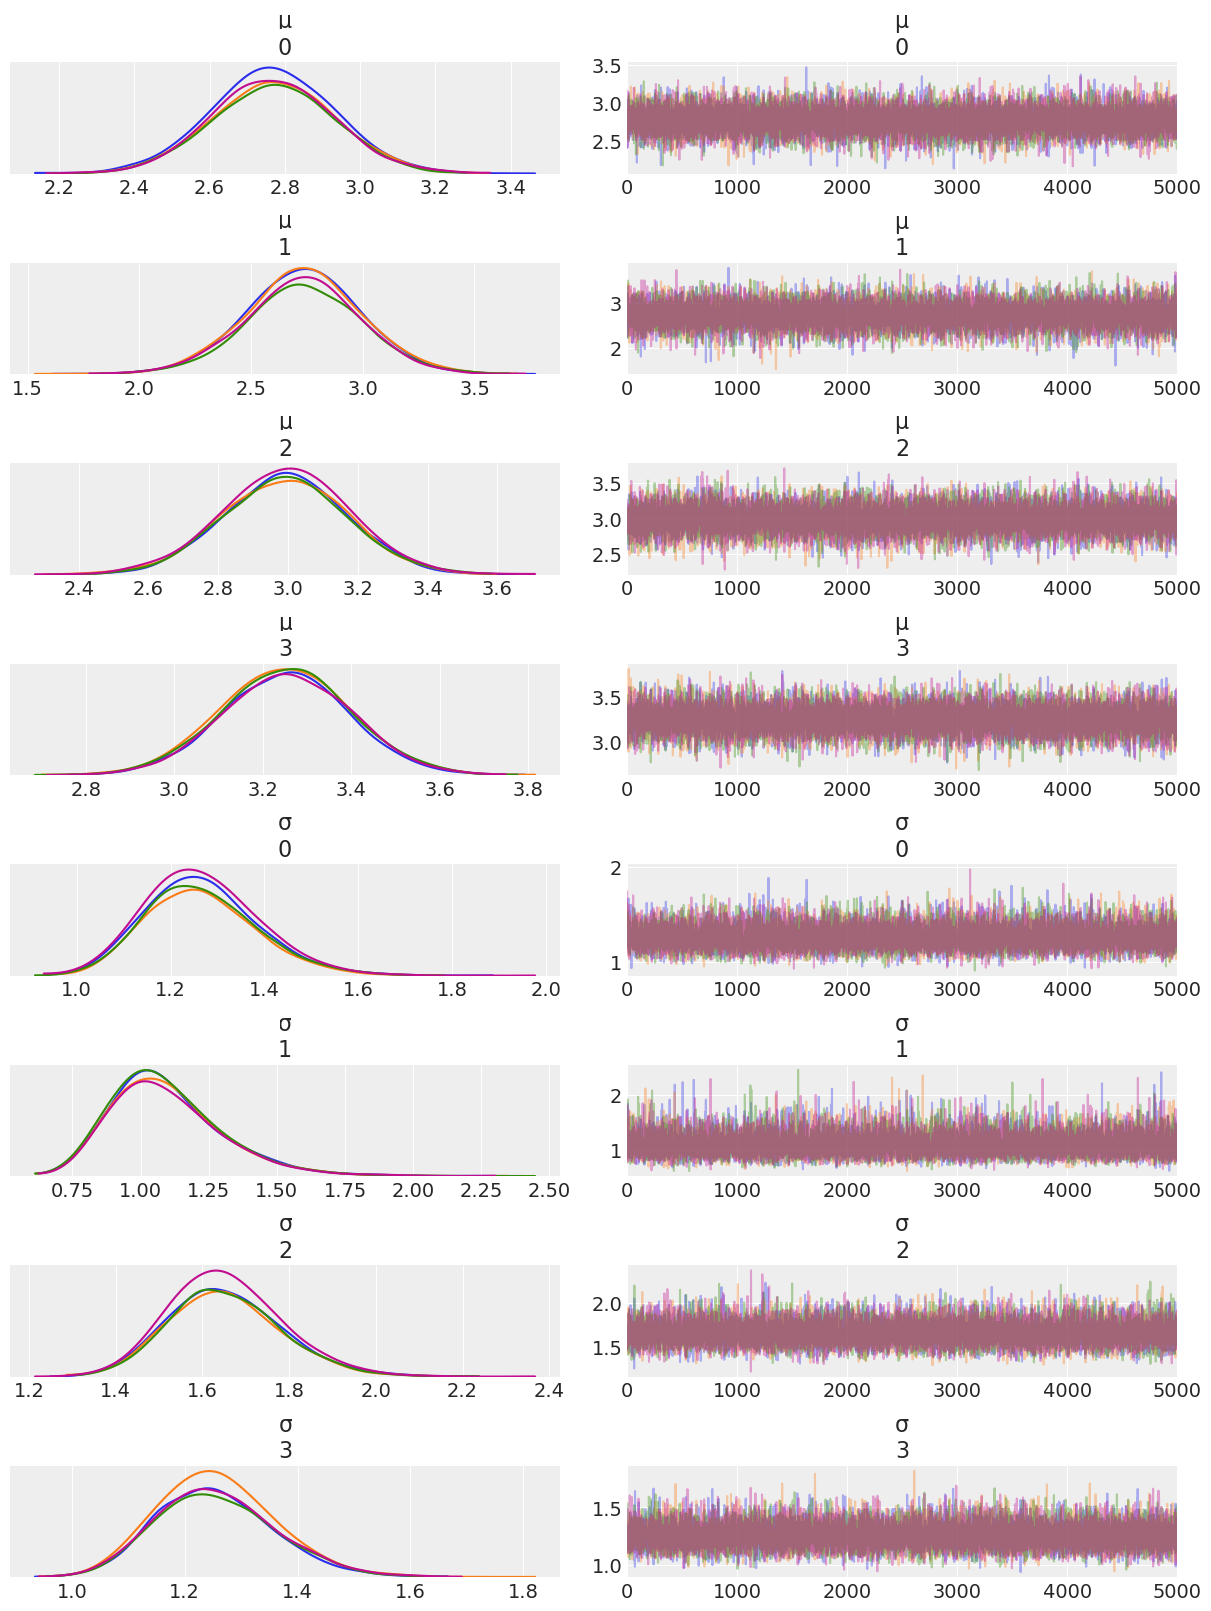

In [195]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)

    trace_cg = pm.sample(5000)
az.plot_trace(trace_cg)
plt.savefig('B11197_02_17.png', dpi=300)

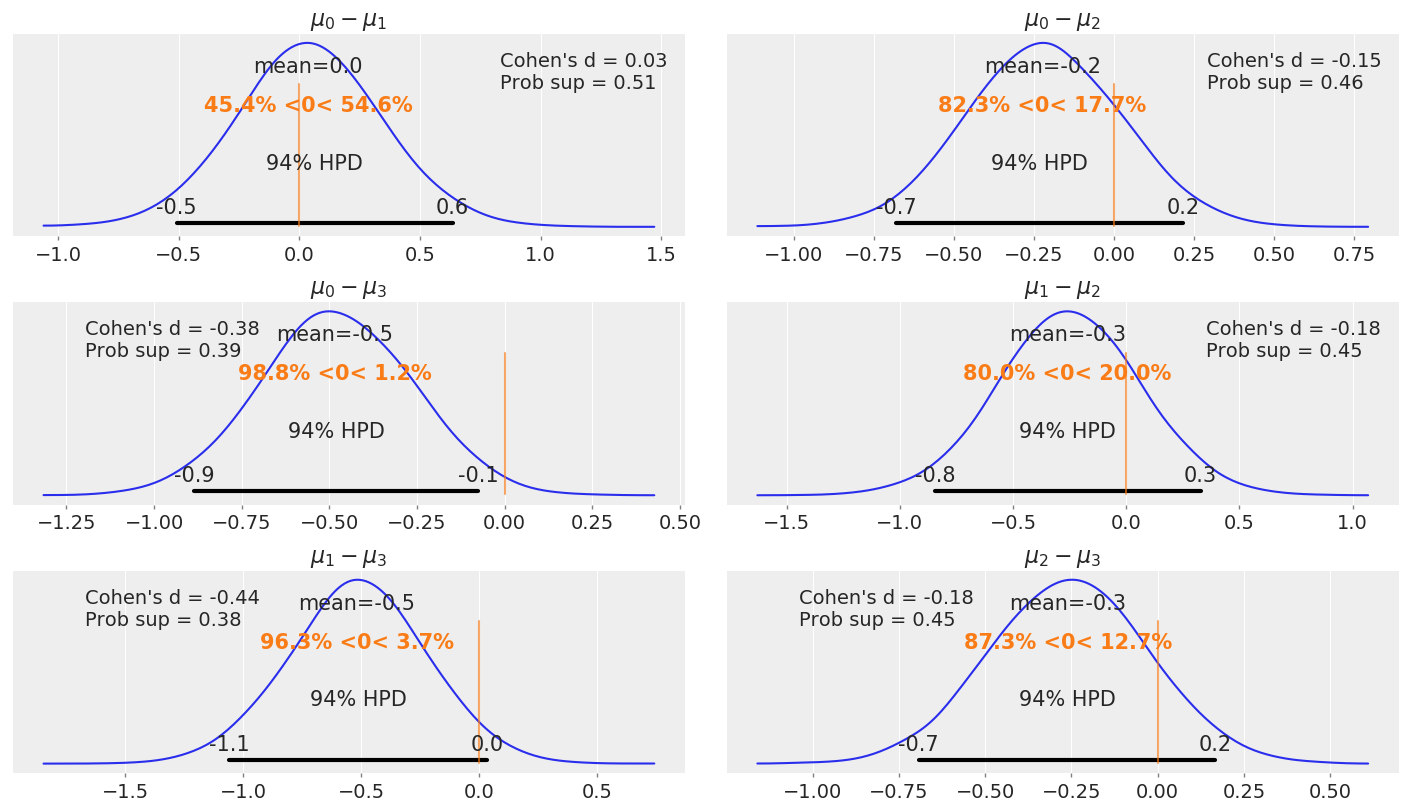

In [197]:
dist = stats.norm()

_, ax = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)

comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]
pos = [(k, l) for k in range(3) for l in (0, 1)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = trace_cg['μ'][:, i] - trace_cg['μ'][:, j]
    d_cohen = (means_diff / np.sqrt((trace_cg['σ'][:, i]**2 + trace_cg['σ'][:, j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend()
plt.savefig('B11197_02_18.png', dpi=300)

# Hierarchical Models

 <img src="B11197_02_19.png" width="500">

In [198]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]  # [3, 3, 3]  [18, 3, 3]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [199]:
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10)

    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ, shape=len(N_samples))
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)

    trace_h = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, κ, μ]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:03<00:00, 3144.13draws/s]


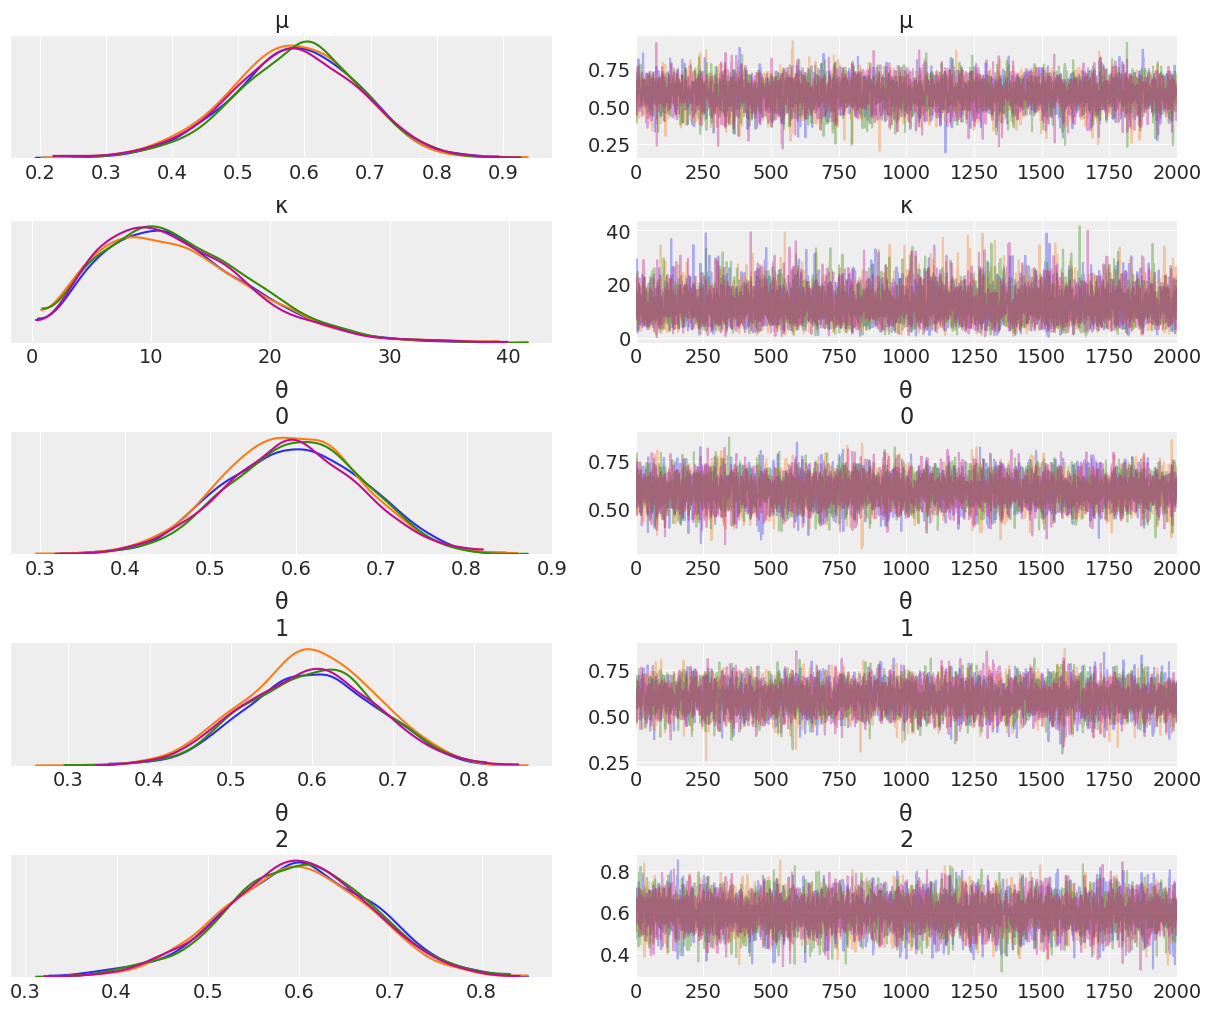

In [200]:
az.plot_trace(trace_h)
plt.savefig('B11197_02_20.png', dpi=300)

In [33]:
az.summary(trace_h)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,0.58,0.10,0.00,0.40,0.76,3111.0,1.0
κ,12.18,6.18,0.14,2.13,24.00,2814.0,1.0
θ[0],0.60,0.08,0.00,0.45,0.74,3651.0,1.0
θ[1],0.60,0.08,0.00,0.45,0.74,3008.0,1.0
θ[2],0.60,0.08,0.00,0.45,0.74,3271.0,1.0


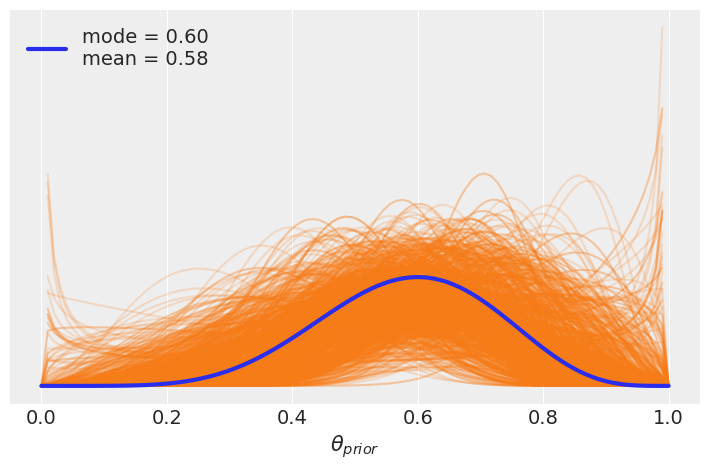

In [202]:
x = np.linspace(0, 1, 100)
for i in np.random.randint(0, len(trace_h), size=1000):
    u = trace_h['μ'][i]
    k = trace_h['κ'][i]
    pdf = stats.beta(u*k, (1.0-u)*k).pdf(x)
    plt.plot(x, pdf,  'C1', alpha=0.2)

u_mean = trace_h['μ'].mean()
k_mean = trace_h['κ'].mean()
dist = stats.beta(u_mean*k_mean, (1.0-u_mean)*k_mean)
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, lw=3, label=f'mode = {mode:.2f}\nmean = {mean:.2f}')
plt.yticks([])

plt.legend()
plt.xlabel('$θ_{prior}$')
plt.tight_layout()
plt.savefig('B11197_02_21.png', dpi=300)

In [205]:
cs_data = pd.read_csv('../data/chemical_shifts_theo_exp.csv')
diff = cs_data.theo.values - cs_data.exp.values
idx = pd.Categorical(cs_data['aa']).codes
groups = len(np.unique(idx))

In [206]:
with pm.Model() as cs_nh:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=diff)

    trace_cs_nh = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1510.05draws/s]


In [207]:
with pm.Model() as cs_h:
    # hyper_priors
    μ_μ = pm.Normal('μ_μ', mu=0, sd=10)
    σ_μ = pm.HalfNormal('σ_μ', 10)

    # priors
    μ = pm.Normal('μ', mu=μ_μ, sd=σ_μ, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=diff)

    trace_cs_h = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ, σ_μ, μ_μ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1284.45draws/s]


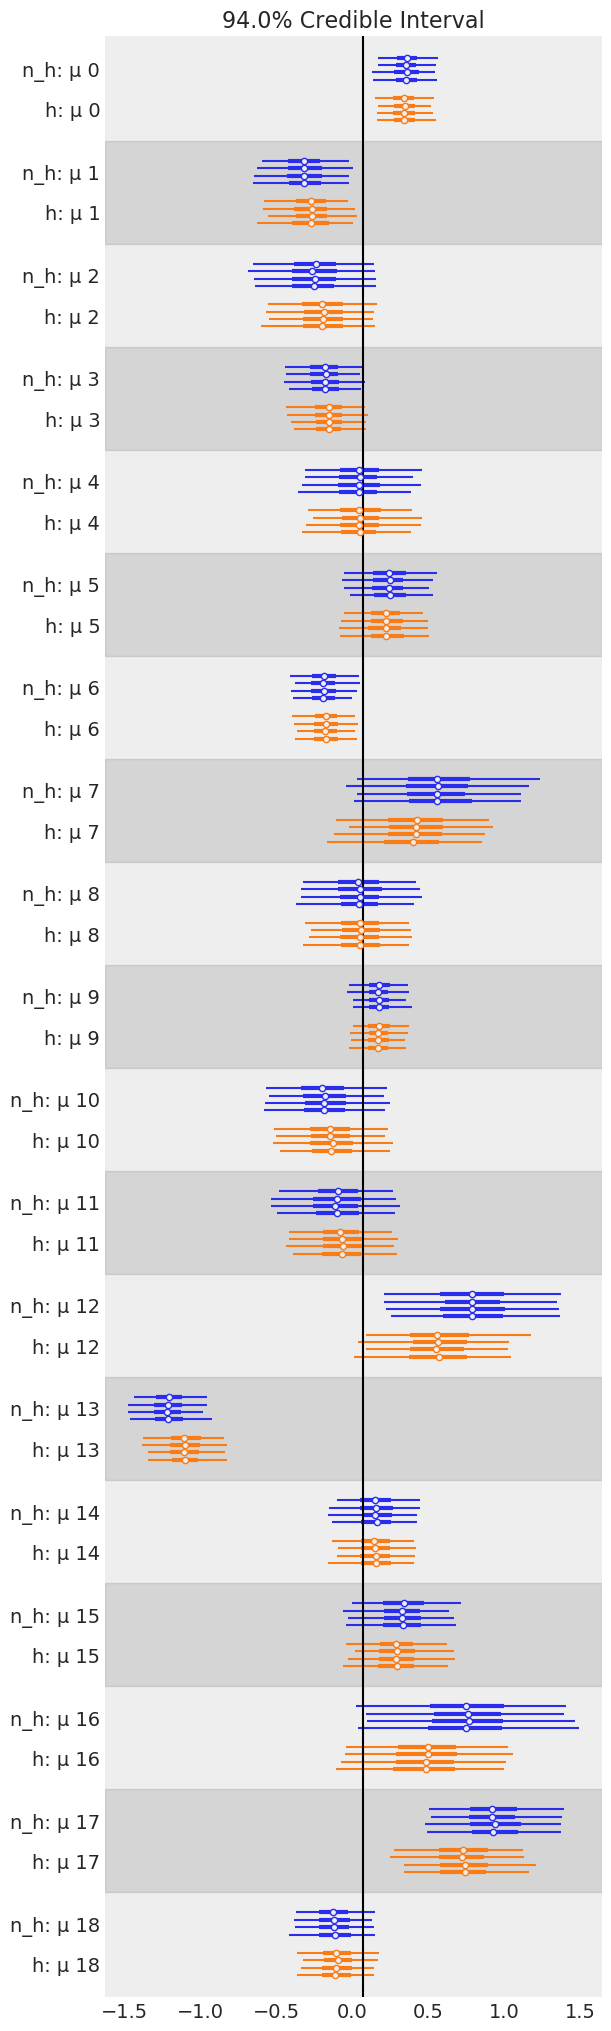

In [208]:
_, axes = az.plot_forest([trace_cs_nh, trace_cs_h],
                         model_names=['n_h', 'h'],
                         var_names='μ', combined=False, colors='cycle')
y_lims = axes[0].get_ylim()
axes[0].vlines(trace_cs_h['μ_μ'].mean(), *y_lims)
plt.savefig('B11197_02_22.png', dpi=300)